In [31]:
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [32]:
m=input("please choose the person:  ")
n=input("please choose the picture, n> 5:  ")



please choose the person:  7
please choose the picture, n> 5:  8


You choosed this picture:


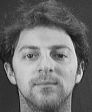

In [33]:
my_str= "orlfaces/s{}/{}.pgm".format(m,n)
my_pic5=Image.open(my_str)
print("You choosed this picture:")
my_pic5

In [34]:
selected_image= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
selected_image_normalize = cv.normalize(selected_image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
selected_image_normalize=np.reshape(selected_image_normalize,(10304,))
selected_image_normalize.shape
selected_image_normalize=selected_image_normalize-selected_image_normalize.mean()

In [35]:
TRAIN=np.zeros((10304,200))
for i in range(1,41,1):
    for j in range(1,6,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        TRAIN[:,(i-1)*5+(j-1)]=y
        

In [36]:
TRAIN_mean=np.reshape(TRAIN.mean(0),(200,1))
ones_vector=np.ones((10304,1))
TRAIN_mean_zero=TRAIN-np.matmul(ones_vector,TRAIN_mean.T)


In [37]:
from scipy.linalg import svd
U, s, VT = svd(TRAIN_mean_zero)

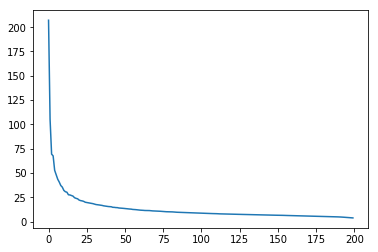

In [38]:
plt.plot(s)


In [39]:
U[:,0:20]



array([[-0.00778028, -0.01386216, -0.01965973, ...,  0.00123534,
        -0.00481436,  0.0081598 ],
       [-0.00776484, -0.01399294, -0.0197182 , ...,  0.00043634,
        -0.00497061,  0.00609916],
       [-0.00761462, -0.01397195, -0.01974414, ...,  0.00097291,
        -0.00403964,  0.00638621],
       ...,
       [-0.01483354, -0.00203668,  0.00207724, ..., -0.01085729,
         0.01364029,  0.00735296],
       [-0.01461804, -0.00276609,  0.0028499 , ..., -0.0084605 ,
         0.01563714,  0.0087119 ],
       [-0.01485321, -0.00400252,  0.00143008, ..., -0.00517356,
         0.01564285,  0.00763888]])

In [40]:
TEST=np.zeros((10304,200))
for i in range(1,41,1):
    for j in range(6,11,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        TEST[:,(i-1)*5+(j-6)]=y
        

In [41]:

TEST_mean=np.reshape(TEST.mean(0),(200,1))
TEST_mean_zero=TRAIN-np.matmul(ones_vector,TEST_mean.T)
projected_TEST= np.matmul(TEST_mean_zero.T,U[:,0:20])
projected_TEST.shape

(200, 20)

In [42]:
projected_selected_image=np.matmul(selected_image_normalize,U[:,0:20])
selected_image_normalize.shape

(10304,)

In [43]:

def minIndex(A):
    mi = 0
    for i in range(len(A)):
        if A[i] < A[mi]:
            mi = i
    return mi

In [44]:
L=np.zeros((200,1))
for i in range(200):
    dist_vector=projected_selected_image-projected_TEST[i,:]
    L[i]=math.sqrt(np.matmul(dist_vector.T,dist_vector))


this picture is recognized:


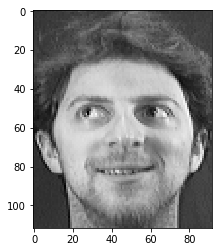

In [45]:
zzz=TRAIN[:, minIndex(L)]
zzzz=np.reshape(zzz,(112, 92))
zzzz
zx=zzzz*255
print("this picture is recognized:")
plt.imshow(zx, cmap='gray', vmin=0, vmax=255)